<a href="https://colab.research.google.com/github/vicalfayo09/steer_price_prediction_ml/blob/main/datasetloading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAIN CODE**

In [349]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [350]:
pd.set_option('display.max_columns', None)

In [351]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [352]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [353]:
#https://drive.google.com/file/d/1yi6uL3islOb2a5XZEBmQlF1NnSRroMHT/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1yi6uL3islOb2a5XZEBmQlF1NnSRroMHT'})

In [354]:
fileDownloaded.GetContentFile('AJA01.20221011194750.csv')

In [355]:
import pandas as pd
df = pd.read_csv('AJA01.20221011194750.csv')

df.head()

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks 200-249kg,Euro,NaN
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks 250-299kg,Euro,NaN
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks 300-349kg,Euro,238.29
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks 350-399kg,Euro,270.47
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks 400-449kg,Euro,302.43


In [356]:
df.describe(include="all")

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,UNIT,VALUE
count,1288,1288,1288.000000,1288.000000,1288,1288,1288,1207.000000
unique,2,2,NaN,NaN,14,14,1,NaN
top,AJA01C1,Cattle Price per Head,NaN,NaN,B200,Bullocks 200-249kg,Euro,NaN
freq,644,644,NaN,NaN,92,92,1288,NaN
mean,NaN,NaN,1998.500000,1998.500000,NaN,NaN,NaN,369.926001
std,NaN,NaN,13.281075,13.281075,NaN,NaN,NaN,258.764418
min,NaN,NaN,1976.000000,1976.000000,NaN,NaN,NaN,46.240000
25%,NaN,NaN,1987.000000,1987.000000,NaN,NaN,NaN,154.950000
50%,NaN,NaN,1998.500000,1998.500000,NaN,NaN,NaN,228.073462
75%,NaN,NaN,2010.000000,2010.000000,NaN,NaN,NaN,560.516376


In [357]:
df.isna().sum()

STATISTIC CODE     0
Statistic          0
TLIST(A1)          0
Year               0
C01782V02140       0
Type of Cattle     0
UNIT               0
VALUE             81
dtype: int64

In [358]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


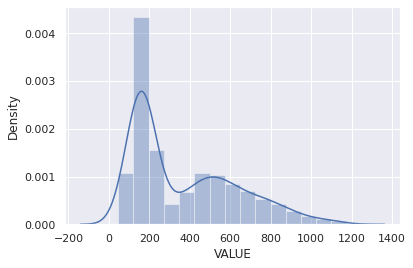

In [359]:
sns.distplot(df['VALUE'])

In [360]:
new = df['Type of Cattle'].str.split(" ", n = 1, expand=True)

In [361]:
df['Type of Cattle'] = new[0]
df.insert(6, "Weight", new[1])

In [362]:
df

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200-249kg,Euro,NaN
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250-299kg,Euro,NaN
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300-349kg,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350-399kg,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400-449kg,Euro,302.430000
...,...,...,...,...,...,...,...,...,...
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250-299kg,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300-349kg,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350-399kg,Euro,216.965995
1286,AJA01C2,Cattle Price per 100 Kg,2021,2021,H400,Heifers,400-449kg,Euro,216.796269


In [363]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

x = df['Weight']
y = df['VALUE']
newprice = df.iloc[:, 8].values


In [364]:
price = newprice.reshape(-1, 1)
price

array([[         nan],
       [         nan],
       [238.29      ],
       ...,
       [216.96599474],
       [216.79626892],
       [         nan]])

In [365]:
#To calculate the median use imputer class
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer = imputer.fit(price)
y = imputer.transform(price)
print(y)

[[228.07346206]
 [228.07346206]
 [238.29      ]
 ...
 [216.96599474]
 [216.79626892]
 [228.07346206]]


In [366]:
df['VALUE'] = y

In [367]:
df.isna().sum()

STATISTIC CODE    0
Statistic         0
TLIST(A1)         0
Year              0
C01782V02140      0
Type of Cattle    0
Weight            0
UNIT              0
VALUE             0
dtype: int64

In [368]:
df['Type of Cattle'] = df['Type of Cattle'].replace("Cows", "Bullocks")
df['Weight'] = df['Weight'].replace("for slaughter", "550")

In [369]:
df.rename(columns = {'Weight': 'Weight in kg'}, inplace=True)

In [370]:
df['Weight in kg']
type(df['Weight in kg'])
df.dtypes

STATISTIC CODE     object
Statistic          object
TLIST(A1)           int64
Year                int64
C01782V02140       object
Type of Cattle     object
Weight in kg       object
UNIT               object
VALUE             float64
dtype: object

In [371]:
df['Weight in kg'] = df['Weight in kg'].str.replace('\D', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [372]:
new2 = df['Weight in kg'].str.split(" ", n = 1, expand=True)
split1 = df.insert(7, "Min Weight in kg", new2[0])
split2 = df.insert(8, "Max Weight in kg", new2[1])

In [373]:
data1 = df.copy()
data1['Min Weight in kg'] = pd.to_numeric(data1['Min Weight in kg'])


In [374]:
data1['Min Weight in kg'].dtypes

dtype('int64')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


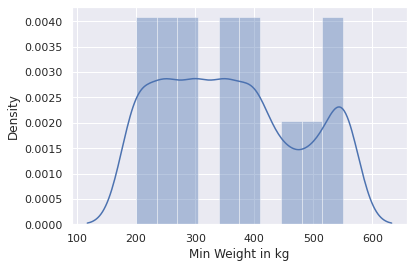

In [375]:
sns.distplot(data1['Min Weight in kg'])

In [376]:
data1['Min Weight in kg'] = data1['Min Weight in kg'].fillna(550)
data1['Max Weight in kg'] = pd.to_numeric(data1['Max Weight in kg'], errors= 'coerce')

In [377]:
data1

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight in kg,Min Weight in kg,Max Weight in kg,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200 249,200,249.0,Euro,228.073462
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250 299,250,299.0,Euro,228.073462
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300 349,300,349.0,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350 399,350,399.0,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400 449,400,449.0,Euro,302.430000
...,...,...,...,...,...,...,...,...,...,...,...
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250 299,250,299.0,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300 349,300,349.0,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350 399,350,399.0,Euro,216.965995
1286,AJA01C2,Cattle Price per 100 Kg,2021,2021,H400,Heifers,400 449,400,449.0,Euro,216.796269


In [378]:
data1 = data1.dropna(axis = 0)

In [379]:
type(df['Max Weight in kg'].values)

numpy.ndarray

In [380]:
df.dropna(inplace=True,axis=0)

In [381]:
df

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight in kg,Min Weight in kg,Max Weight in kg,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200 249,200,249,Euro,228.073462
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250 299,250,299,Euro,228.073462
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300 349,300,349,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350 399,350,399,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400 449,400,449,Euro,302.430000
...,...,...,...,...,...,...,...,...,...,...,...
1282,AJA01C2,Cattle Price per 100 Kg,2021,2021,H200,Heifers,200 249,200,249,Euro,222.738691
1283,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250 299,250,299,Euro,216.991177
1284,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300 349,300,349,Euro,215.245632
1285,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350 399,350,399,Euro,216.965995


In [382]:
import sqlite3
import sqlalchemy

In [383]:
engine = sqlalchemy.create_engine('sqlite:///steer_data.db')

In [384]:
df.to_sql('steer_statistics_table', engine, if_exists='replace', index=False)

In [385]:
pd.read_sql('steer_statistics_table', engine)

,STATISTIC CODE,Statistic,TLIST(A1),Year,C01782V02140,Type of Cattle,Weight in kg,Min Weight in kg,Max Weight in kg,UNIT,VALUE
0,AJA01C1,Cattle Price per Head,1976,1976,B200,Bullocks,200 249,200,249,Euro,228.073462
1,AJA01C1,Cattle Price per Head,1976,1976,B250,Bullocks,250 299,250,299,Euro,228.073462
2,AJA01C1,Cattle Price per Head,1976,1976,B300,Bullocks,300 349,300,349,Euro,238.290000
3,AJA01C1,Cattle Price per Head,1976,1976,B350,Bullocks,350 399,350,399,Euro,270.470000
4,AJA01C1,Cattle Price per Head,1976,1976,B400,Bullocks,400 449,400,449,Euro,302.430000
...,...,...,...,...,...,...,...,...,...,...,...
1191,AJA01C2,Cattle Price per 100 Kg,2021,2021,H200,Heifers,200 249,200,249,Euro,222.738691
1192,AJA01C2,Cattle Price per 100 Kg,2021,2021,H250,Heifers,250 299,250,299,Euro,216.991177
1193,AJA01C2,Cattle Price per 100 Kg,2021,2021,H300,Heifers,300 349,300,349,Euro,215.245632
1194,AJA01C2,Cattle Price per 100 Kg,2021,2021,H350,Heifers,350 399,350,399,Euro,216.965995


In [386]:
x = data1.iloc[:,7:9]
y = data1['VALUE']

In [387]:
x

,Min Weight in kg,Max Weight in kg
0,200,249.0
1,250,299.0
2,300,349.0
3,350,399.0
4,400,449.0
...,...,...
1282,200,249.0
1283,250,299.0
1284,300,349.0
1285,350,399.0


In [388]:
#x.to_sql('steer_weight_table')

In [389]:
x['Max Weight in kg'] = x.iloc[:, 1].astype(int)

In [390]:
x

,Min Weight in kg,Max Weight in kg
0,200,249
1,250,299
2,300,349
3,350,399
4,400,449
...,...,...
1282,200,249
1283,250,299
1284,300,349
1285,350,399


In [391]:
x.to_sql('steer_weight_table', engine, if_exists='replace', index=False)

In [392]:
pd.read_sql('steer_weight_table', engine)

,Min Weight in kg,Max Weight in kg
0,200,249
1,250,299
2,300,349
3,350,399
4,400,449
...,...,...
1099,200,249
1100,250,299
1101,300,349
1102,350,399


In [393]:
x.shape

(1104, 2)

In [394]:
y.shape

(1104,)

Text(0.5, 1.0, 'Steer Price Data')

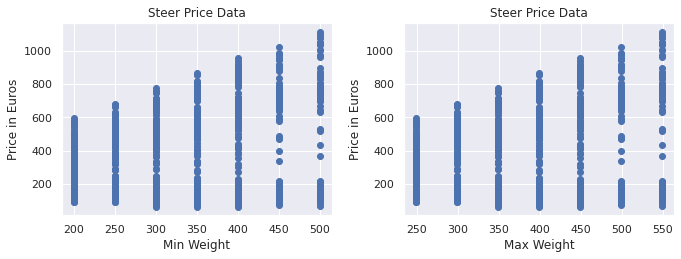

In [395]:
sns.set()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(10,4))
fig.tight_layout(pad  = 3.0)
ax1.scatter(x.iloc[:,0],y)
ax1.set_xlabel("Min Weight")
ax1.set_ylabel("Price in Euros")
ax1.set_title("Steer Price Data")

ax2.scatter(x.iloc[:,1],y)
ax2.set_xlabel("Max Weight")
ax2.set_ylabel("Price in Euros")
ax2.set_title("Steer Price Data")

In [396]:
from sklearn.preprocessing import StandardScaler
value = np.log(y)
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)




In [397]:
x_scaled.shape

(1104, 2)

In [398]:
#x_scaled

In [399]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from math import sqrt
x_train,x_test,y_train,y_test=train_test_split(x_scaled, value,train_size=0.8, random_state=365)
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn.score(x_train,y_train)

-0.2488682354155607

In [400]:
r2_score(y_test, knn_pred)

-0.36484682743811314

In [401]:
mean_squared_error(y_test, knn_pred)

0.6377199041969762

In [402]:
rmse = sqrt(mean_squared_error(y_test, knn_pred))
rmse

0.7985736686098386

In [403]:
import pickle as pk

In [404]:
model = knn
model.fit(x_train, y_train)
pickle_out = open('steer_model.pkl', 'wb')
pk.dump(model, pickle_out)
model.fit(x_train,y_train)
pred = model.predict(x_test)
#pickle_out.close()

In [405]:
pickled_model = pk.load(open('steer_model.pkl', 'rb'))
pickled_model.predict(x_test)

array([5.96049977, 6.21751196, 5.34026827, 5.32644107, 5.34026827,
       6.21751196, 5.34026827, 5.96049977, 5.88600622, 5.88600622,
       5.96049977, 5.88600622, 5.96049977, 5.34026827, 5.42037191,
       5.34026827, 6.21751196, 5.32644107, 6.21751196, 5.3240985 ,
       5.96049977, 6.21751196, 5.34026827, 5.96049977, 5.88600622,
       5.34026827, 5.96049977, 5.96049977, 5.96049977, 6.21751196,
       6.21751196, 5.88600622, 5.34026827, 5.32644107, 5.96049977,
       5.34026827, 5.3240985 , 5.42037191, 5.34026827, 5.32644107,
       5.32644107, 6.21751196, 5.96049977, 5.88600622, 5.88600622,
       5.96049977, 5.96049977, 5.96049977, 6.21751196, 5.96049977,
       5.34026827, 5.34026827, 5.88600622, 5.42037191, 5.32644107,
       5.34026827, 5.96049977, 5.3240985 , 5.88600622, 5.32644107,
       5.96049977, 5.88600622, 5.96049977, 6.21751196, 5.96049977,
       5.96049977, 5.34026827, 6.21751196, 6.21751196, 6.21751196,
       5.34026827, 5.32644107, 5.32644107, 5.3240985 , 6.21751

In [406]:
!pip install flask-ngrok
!pip install flask-bootstrap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [413]:
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok

deb https://ngrok-agent.s3.amazonaws.com buster main
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 https://ngrok-agent.s3.amazonaws.com buster InRelease [20.3 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [1,039 kB]
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 https://ngrok-agent.s3.amazonaws.com buster/main amd64 Packages [1,588 B]
Hit:13 http://ppa

In [414]:
!ngrok authtoken 2IPVkOKmGqvykweHVVEg0J9xY8X_3E9ktLLD4qbJeWToCN4B

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [428]:
from flask import Flask,request,jsonify
from flask_ngrok import run_with_ngrok
steer_model = pk.load(open('steer_model.pkl','rb'))
app = Flask(__name__)
run_with_ngrok(app)
@app.route('/')
def index():
    return "<h1>Welcome to the steer pricing application</h1>"
@app.route('/predict',methods=['POST'])
def predict():
    min_weight = request.form.get('Min Weight in kg')
    max_weight = request.form.get('Max Weight in kg')
    input_query = np.array([[min_weight, max_weight]])
    result = steer_model.predict(input_query)[0]
    return jsonify({'Steer Price':str(result)})

    app.run()

In [429]:
import requests

result = requests.get("http://a0c4-34-125-7-43.ngrok.io")
print(result.text)

<!DOCTYPE html>
<html lang="en-US">
  <head>
    <meta charset="utf-8">
    <meta name="author" content="ngrok">
    <meta name="description" content="ngrok is the fastest way to put anything on the internet with a single command.">
    <meta name="robots" content="noindex, nofollow">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <link id="style" rel="stylesheet" href="https://cdn.ngrok.com/static/css/error.css">
    <noscript>Tunnel a0c4-34-125-7-43.ngrok.io not found (ERR_NGROK_3200)</noscript>
    <script id="script" src="https://cdn.ngrok.com/static/js/error.js" type="text/javascript"></script>
  </head>
  <body id="ngrok">
    <div id="root" data-payload="eyJjZG5CYXNlIjoiaHR0cHM6Ly9jZG4ubmdyb2suY29tLyIsImNvZGUiOiIzMjAwIiwibWVzc2FnZSI6IlR1bm5lbCBhMGM0LTM0LTEyNS03LTQzLm5ncm9rLmlvIG5vdCBmb3VuZCIsInRpdGxlIjoiTm90IEZvdW5kIn0="></div>
  </body>
</html>



**Error rate for different K-values**

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

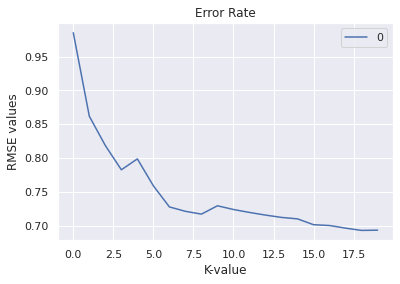

In [430]:
curve = pd.DataFrame(rmse_val)
curve.plot()
plt.xlabel('K-value')
plt.ylabel('RMSE values')
plt.title('Error Rate')
plt.show()

In [437]:
table_data_for_rmse_values = curve
table_data_for_rmse_values.columns = ["RMSE_value"]
table_data_for_rmse_values

,RMSE_value
0,0.985168
1,0.861705
2,0.818317
3,0.782473
4,0.798574
5,0.758736
6,0.727553
7,0.721022
8,0.716902
9,0.729237


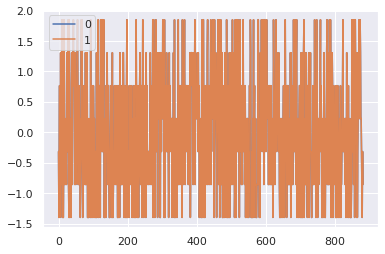

In [438]:
train_set = pd.DataFrame(x_train)
train_set.plot()

**Optimal Value for neighbor**
**Validate model with sample**

**Implementing GridSearchCV**
- For deciding the value of k, plotting the elbow curve every time is be a cumbersome and tedious process. You can simply use gridsearch to find the best value.

In [431]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
knn_pred = model.predict(x_test)
model.best_params_

{'n_neighbors': 9}

In [432]:
r2_score(y_test, knn_pred)

-0.09995146940715349

In [433]:
predictions = pd.DataFrame(knn_pred, columns=["Predictions"])
predictions

,Predictions
0,5.822295
1,5.769415
2,5.354797
3,5.543624
4,5.354797
...,...
216,5.822295
217,5.543624
218,5.543624
219,5.543624


In [435]:
rmse = sqrt(mean_squared_error(y_test, knn_pred))
rmse

0.71690199824581

In [436]:
mse = mean_squared_error(y_test, knn_pred)
mse

0.5139484750888355

In [ ]:
sns.set()

fig, ax = plt.subplots()

#ax.plot(list(range(1, K)),
        #mse_lin,
        #color = 'orange',
        #label = 'linear')

ax.plot(list(range(1, K)),
        rmse_val,
        color = 'red',
        #marker = 'o',
        markerfacecolor = '#000C1F'
        #label = 'non-linear'
        )
ax.legend(loc= 'lower right')
ax.set_title('Root Mean Squared Error (MSE)')
ax.set_ylabel('K')
ax.set_ylabel('RMSE')

plt.ylim(0);